In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print('정확도 = ', accuracy_score(y_test, pred))
    print('정밀도 = ', precision_score(y_test, pred))
    print('재현율 = ', recall_score(y_test, pred))
    print('f1_score = ', f1_score(y_test, pred))
    print('AUC_score = ', roc_auc_score(y_test, pred, average='macro'))

In [3]:
data = pd.read_csv('C:\\Users\\user\\Documents\\Python\\data\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

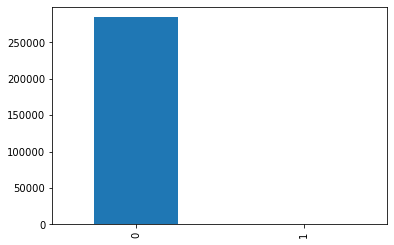

In [5]:
print(data.iloc[:, -1].value_counts())
data.iloc[:, -1].value_counts().plot(kind='bar')

# Base_model

In [6]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 10)

In [8]:
print(y_train.value_counts() / y_train.count() * 100)
print(y_test.value_counts() / y_test.count() * 100)

0    99.827251
1     0.172749
Name: Class, dtype: float64
0    99.827252
1     0.172748
Name: Class, dtype: float64


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 =  0.9989607033510295
정밀도 =  0.7058823529411765
재현율 =  0.6829268292682927
f1_score =  0.6942148760330579
AUC_score =  0.8412172097072341


In [10]:
lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb, X_train, X_test, y_train, y_test)

정확도 =  0.9996067526193084
정밀도 =  0.9611650485436893
재현율 =  0.8048780487804879
f1_score =  0.8761061946902655
AUC_score =  0.9024108866843111


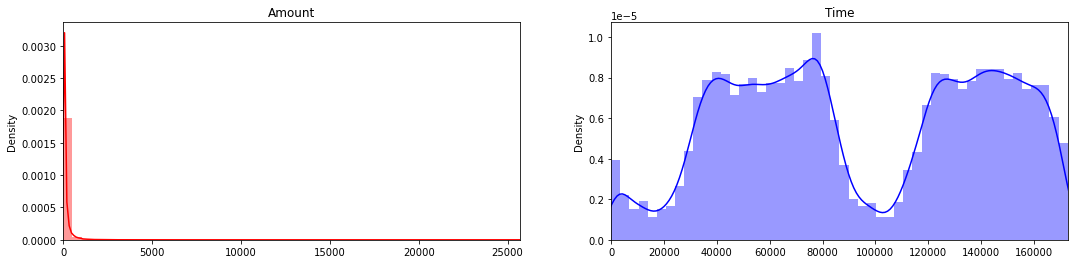

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
amount = data['Amount'].values
time = data['Time'].values

sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title("Amount")
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title("Time")
ax[1].set_xlim([min(time), max(time)])

plt.show()

# 정규화

- Amount와 Time은 연속적인 데이터이며, 데이터 범위가 넓음
- 로지스틱 회귀와 같은 회귀 종류의 모델들은 정규 분포로 데이터가 분포 되어 있는 것을 선호함
- Normalization을 통해 데이터의 분포 변경

In [ ]:
scaler = StandardScaler()

data['std_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['loged_amount'] = np.log1p(data['Amount'].values.reshape(-1, 1))

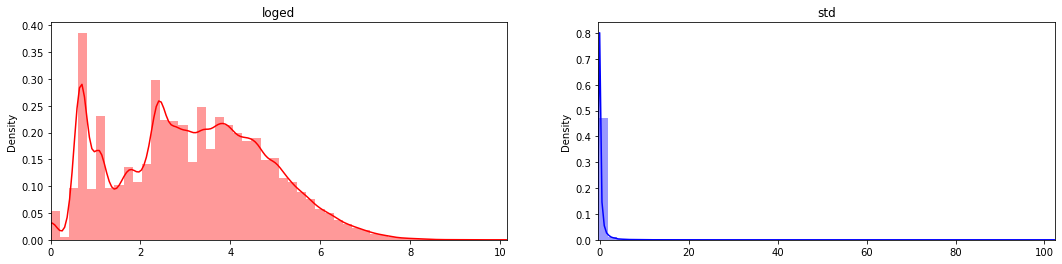

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
loged_amount = data['loged_amount'].values
std_amount = data['std_amount'].values

sns.distplot(loged_amount, ax=ax[0], color='r')
ax[0].set_title('loged')
ax[0].set_xlim([min(loged_amount), max(loged_amount)])

sns.distplot(std_amount, ax=ax[1], color='b')
ax[1].set_title('std')
ax[1].set_xlim([min(std_amount), max(std_amount)])

plt.show()

### Amount
- std 사용
    - 기존 그래프의 분포와 비슷한 형태

In [18]:
rob_scaler = RobustScaler()

data['rob_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['loged_time'] = np.log1p(data['Time'].values.reshape(-1, 1))
data['std_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

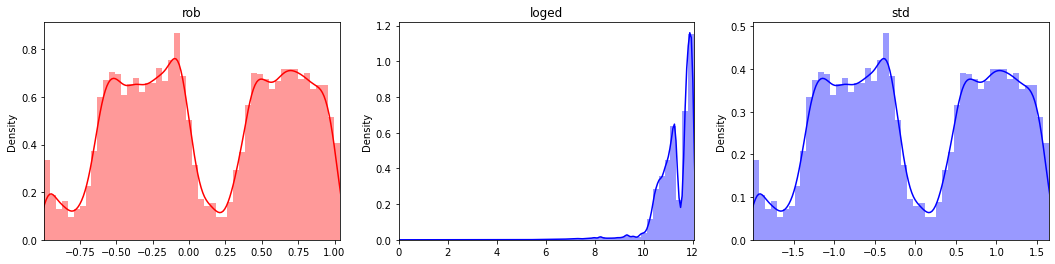

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
rob_time = data['rob_time'].values
loged_time = data['loged_time'].values
std_time = data['std_time'].values

sns.distplot(rob_time, ax=ax[0], color='r')
ax[0].set_title('rob')
ax[0].set_xlim([min(rob_time), max(rob_time)])

sns.distplot(loged_time, ax=ax[1], color='b')
ax[1].set_title('loged')
ax[1].set_xlim([min(loged_time), max(loged_time)])


sns.distplot(std_time, ax=ax[2], color='b')
ax[2].set_title('std')
ax[2].set_xlim([min(std_time), max(std_time)])

plt.show()

### Time
- rob 사용
    - 기존 그래프의 분포와 비슷한 형태
    - 데이터 범위가 가장 작음

In [20]:
data.drop(['loged_time','std_time','Time','loged_amount','Amount'], axis = 1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,rob_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


In [21]:
scaled_amount = data['std_amount']
scaled_time = data['rob_time']

data.drop(['std_amount', 'rob_time'], axis = 1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(0, 'scaled_time', scaled_time)
data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [22]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state=0)

In [23]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 =  0.9992135052386169
정밀도 =  0.8526315789473684
재현율 =  0.6585365853658537
f1_score =  0.7431192660550459
AUC_score =  0.829169810712162


In [24]:
lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb, x_train = X_train, x_test = X_test, y_train = y_train, y_test = y_test)

정확도 =  0.9995646189713772
정밀도 =  0.96
재현율 =  0.7804878048780488
f1_score =  0.8609865470852018
AUC_score =  0.8902157647330915


### 로지스틱 회귀
- 정밀도 : 0.71 -> 0.85
- 재현율 : 0.68 -> 0.66
- f1-score : 0.69 -> 0.74
### LGBM
- 큰 변화 없음